# 基本結構

In [1]:
# 引入套件
import pandas as pd

## DataFrame各部位介紹：位置示範[列數,欄數]

In [12]:
import numpy as np
df = pd.DataFrame(np.array([["元素[0,0]","元素[0,1]"],
                            ["元素[1,0]","元素[1,1]"]]))
df.columns = ["column 0","column 1"]
df.index = ["index 0","index 1"]
df

,column 0,column 1
index 0,"元素[0,0]","元素[0,1]"
index 1,"元素[1,0]","元素[1,1]"


## Series各部位介紹：位置示範[列數(index)]

In [13]:
series = pd.Series(np.array(["元素0","元素1"]))
series.columns = ["column"]
series.index = ["index 0","index 1"]
series

index 0    元素0
index 1    元素1
dtype: object

# 從其他資料結構製造pandas

In [90]:
# array -> series
# array內容變成Series裡的values

content = np.array(["元素0","元素1"])
pd.Series(content)

0    元素0
1    元素1
dtype: object

In [8]:
# list -> series
# list內容變成Series裡的values

content = ["元素0","元素1"]
pd.Series(content)

0    元素0
1    元素1
dtype: object

In [87]:
# dictionary -> series
# key值會變成對應index；value值變成對應內容

C = {"content":["元素0","元素1"]}
pd.Series(C)

content    [元素0, 元素1]
dtype: object

In [85]:
# array -> dataframe

content = np.array([["元素00","元素01"],
                   ["元素10","元素11"]])
pd.DataFrame(content)

,0,1
0,元素00,元素01
1,元素10,元素11


In [89]:
# list -> dataframe

content = [["元素00","元素01"],
            ["元素10","元素11"]]
pd.DataFrame(content)

,0,1
0,元素00,元素01
1,元素10,元素11


In [88]:
# dictionary -> dataframe
# key值會變成欄位名稱；value值變成對應欄位內容

C = {"content":["元素0","元素1"]}
pd.DataFrame(C)

,content
0,元素0
1,元素1


# 檔案讀取

## 讀取excel檔案示範

* 讀取csv檔案

In [4]:
# 絕對路徑示範

pd.read_csv("/Users/Grace/Desktop/110statistic_1/sticker.csv")

,Unnamed: 0,name,price
0,1,Conan,50
1,2,Pui pui,100
2,3,kanahei's small animals,50


In [5]:
# 如果符合當前路徑，就不用加上前面的資料夾路徑

pd.read_csv("sticker.csv")

,Unnamed: 0,name,price
0,1,Conan,50
1,2,Pui pui,100
2,3,kanahei's small animals,50


In [91]:
# 注意路徑中有中文可能報錯，可用以下方法

import os
Path = "/Users/Grace/Desktop/python/統計/sticker.csv"
pwd = os.getcwd() # 抓取目前路徑
os.chdir(os.path.dirname(Path)) #改變當前工作目錄，到指定路徑
data_revision = pd.read_csv(os.path.basename(Path))
os.chdir(pwd) # 返回原始路徑
data_revision

,Unnamed: 0,name,price
0,1,Conan,50
1,2,Pui pui,100
2,3,kanahei's small animals,50


* 讀取xlsx（活頁簿）

In [6]:
# 相對路徑示範

pd.read_excel("try_2.xlsx")

,Unnamed: 0,groups,num
0,0,M,46
1,1,S,8
2,2,C,12
3,3,F,6


## header問題
pandas會自動讀取檔案裡的第一列為欄位名稱，
如果原始檔案裡恰好沒有欄位名稱，
可能誤讀第一列資料為欄位名稱。

In [64]:
# pandas會自動讀取第一列為欄位

pd.read_csv("report card.csv")

,statistic,80
0,linear algebra,90
1,calculus,60


In [71]:
# header = None 就可以避免讀取第一列為欄位

pd.read_csv("report card.csv", header = None)

,0,1
0,statistic,80
1,linear algebra,90
2,calculus,60


# 認識dataframe

In [93]:
sticker = pd.read_csv("sticker.csv")

* type<br>
dataframe裡，每個欄位可以各自是不同資料型態。<br>
但同一個欄位裡，只能有一種資料型態。

In [114]:
sticker.dtypes

Unnamed: 0     int64
name          object
price          int64
dtype: object

* columns<br>
pandas會自動讀取檔案裡的第一列為欄位名稱，有時可能第一列有部分空白，pandas會從
Unnamed: 0開始自動填寫。

In [115]:
# 欄位
sticker.columns

Index(['Unnamed: 0', 'name', 'price'], dtype='object')

In [99]:
# 指定某欄位名稱，重新命名欄位
sticker.rename(columns={'Unnamed: 0':'No.'}, inplace = True)
sticker

,No.,name,price
0,1,Conan,50
1,2,Pui pui,100
2,3,kanahei's small animals,50


In [18]:
# 所有欄位一起重新命名:（剛剛有header問題，略去讀取第一列後，自行重新命名欄位）
report = pd.read_csv("report card.csv", header = None)
report.columns = ["科目","成績"]
report

,科目,成績
0,statistic,80
1,linear algebra,90
2,calculus,60


* values

In [116]:
# 內容
sticker.values

array([[1, 'Conan', 50],
       [2, 'Pui pui', 100],
       [3, "kanahei's small animals", 50]], dtype=object)

* index

In [117]:
# index
sticker.index

RangeIndex(start=0, stop=3, step=1)

* 維度

In [ ]:
sticker.shape

(3, 3)

# indexing

* 已知資料的「數字絕對位置」：data.iloc[列數,欄數]

In [94]:
sticker.iloc[0,1] # 先列後欄

'Conan'

In [95]:
# (從第幾筆開始)：(到第幾筆以前，不含此數)
# 當前後都省略時，表示全部

sticker.iloc[:,1]

0                      Conan
1                    Pui pui
2    kanahei's small animals
Name: name, dtype: object

In [101]:
# 選取多個列
sticker.iloc[[0,2]]  # 或者sticker.iloc[[0,2],:]

,No.,name,price
0,1,Conan,50
2,3,kanahei's small animals,50


In [102]:
# 選取多個欄
sticker.iloc[:,[0,2]]

,No.,price
0,1,50
1,2,100
2,3,50


* 已知資料的「欄位名稱、index」：data.loc[index數,column名]

In [100]:
sticker.loc[:,["No.","price"]]

,No.,price
0,1,50
1,2,100
2,3,50


* indexing: 先查詢欄位

In [103]:
# 單一欄位
sticker["price"]

0     50
1    100
2     50
Name: price, dtype: int64

In [104]:
sticker["price"][0]

50

# NA: 資料內容有缺值

In [110]:
rep_na = pd.read_csv("rep_na.csv")
rep_na

,科目,成績
0,accounting,NaN
1,auditing,NaN
2,NaN,59.0


In [10]:
rep_na.isna()

,科目,成績
0,False,True
1,False,True
2,True,False


* imputation: 用 replace

In [15]:
# 【例】叫出有空值的欄位，用replace指定np.nan為某些值

import numpy as np
rep_na["成績"].replace({np.nan:[100,100]})

0    100.0
1    100.0
2     59.0
Name: 成績, dtype: float64

In [111]:
# 記得assign回本來的欄位
rep_na["科目"] = rep_na["科目"].replace({np.nan:"English"})
rep_na["成績"] = rep_na["成績"].replace({np.nan:[100,100]})
rep_na

,科目,成績
0,accounting,100.0
1,auditing,100.0
2,English,59.0


# 合併

* concat<br>
提供簡單的橫向或縱向的表格合併，如果沒辦法對齊時會產生很多NA。<br>
axis表示橫向或縱向，0表示列的合併（縱向增加），1表示欄的合併（橫向增加）。

In [19]:
pd.concat([rep_na,report], axis= 0)  

,科目,成績
0,accounting,100.0
1,auditing,100.0
2,English,59.0
0,statistic,80.0
1,linear algebra,90.0
2,calculus,60.0


In [20]:
pd.concat([rep_na,report], axis= 1)

,科目,成績,科目,成績
0,accounting,100.0,statistic,80
1,auditing,100.0,linear algebra,90
2,English,59.0,calculus,60


* join<br>
包含交集、聯集的概念。跟每張表格的特殊key有關。<br>
<br>
【例】希望在現有「科目」、「人數」的表中增添「成績」資訊<br>
<br>
現有紀錄「科目」、「人數」的表格teach；有紀錄「科目」、「成績」的表格rep_na。<br>
此時希望以rep_na為主，插入teach中記載的對應「科目」的「成績」<br>
<br>
【答】適用方法：left join（往左合併）<br>
<br>
如果寫成A.join(B,how = "left")，表示考慮以A資料為主，把B資料對應的內容插入。<br>
(1) 把rep_na和teach的「科目」設置成個別的index<br>
（因為是以「科目」作為兩張表合併的參照欄位）<br>
(2) 寫成A.join(B,how = "left")<br>

In [112]:
teach = pd.read_excel("teach.xlsx")
teach

,科目,人數
0,English,40
1,auditing,80
2,accounting,120
3,economics,90


In [113]:
rep_na

,科目,成績
0,accounting,100.0
1,auditing,100.0
2,English,59.0


In [114]:
# (1) 把rep_na和teach的「科目」設置成個別的index
#（因為是以「科目」作為兩張表合併的參照欄位）

rep_na = rep_na.set_index('科目')
teach = teach.set_index('科目')

In [115]:
# (2)寫成A.join(B,how = "left")

teach.join(rep_na,how='left')

,人數,成績
科目,,
English,40,59.0
auditing,80,100.0
accounting,120,100.0
economics,90,NaN


# 詳細操作：舉例iris資料集
鳶尾花資料集，紀錄三種鳶尾花品種(setosa, versicolor, virginica)的資料，共150朵花的資料，包含紀錄sepal length (cm)、sepal width (cm)、petal length (cm)、petal width (cm)四個欄位，還有一個欄位紀錄該鳶尾花的品種。

In [116]:
# 示範資料

from sklearn import datasets # sklearn內建的資料庫
iris = datasets.load_iris()

In [117]:
[print(i) for i in iris.keys()];

data
target
frame
target_names
DESCR
feature_names
filename
data_module


In [188]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [39]:
iris["data"].shape

(150, 4)

In [118]:
# 由numpy.array轉成dataframe，且指定欄位名稱

import pandas as pd
data = pd.DataFrame(iris["data"],columns = iris["feature_names"])  # 把array的陣列變成dataframe，命名features
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 新增欄位

In [124]:
# 新增欄位：花的品種(target)

data["target"] = [iris["target_names"][d] for d in iris["target"]]  # 新增欄位
data.head()  # 前五筆資料

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 篩選出符合條件的資料

* 找出花種為versicolor的資料

In [59]:
data[data["target"]=="versicolor"].head()  # 僅顯示前五筆示意

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


* 找出sepal length (cm)<5的所有資料

In [61]:
data[data["sepal length (cm)"]<5].head()  # 僅顯示前五筆示意

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
8,4.4,2.9,1.4,0.2,setosa


## 簡單敘述統計：describe()
describe()會自動省略非numeric的欄位，所以此處沒有顯示target的資料。

In [62]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 快速對各欄位/各列處理：apply()
* 求各列的平均值

In [119]:
# axis = 1: to each row

data.apply(np.mean,axis = 1)

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

* 求各欄的平均值

In [120]:
# axis = 0: to each column

data.apply(np.mean,axis = 0) 

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

## 根據某欄內容分類，各別分析：groupby()

* 計算各花品種的平均sepal length

In [51]:
data.groupby(['target'])["sepal length (cm)"].mean()

target
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal length (cm), dtype: float64

## 資料排列：sort_values()

* 把資料依照petal length (cm)大至小排列

In [121]:
data.sort_values("petal length (cm)",ascending = False).head() # 僅顯示前五筆示意

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
118,7.7,2.6,6.9,2.3
122,7.7,2.8,6.7,2.0
117,7.7,3.8,6.7,2.2
105,7.6,3.0,6.6,2.1
131,7.9,3.8,6.4,2.0


## 快速畫圖：plot()

* sepal length (cm)、sepal width (cm)兩欄位資料的散佈圖、直方圖、箱型圖

<AxesSubplot:title={'center':'scatter plot'}, xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

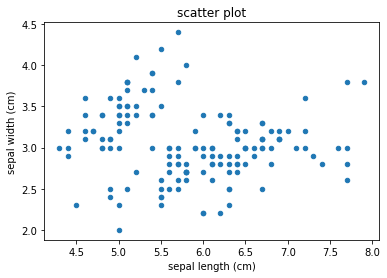

In [122]:
data.plot(x="sepal length (cm)",y = "sepal width (cm)",kind = "scatter",title = "scatter plot")

<AxesSubplot:title={'center':'histogram'}, ylabel='Frequency'>

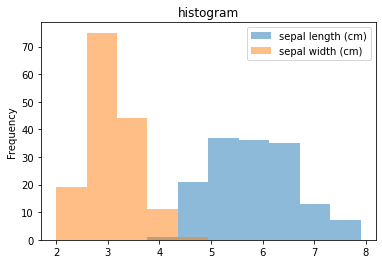

In [81]:
data[["sepal length (cm)","sepal width (cm)"]].plot(kind = "hist",title = "histogram",alpha = 0.5)

<AxesSubplot:>

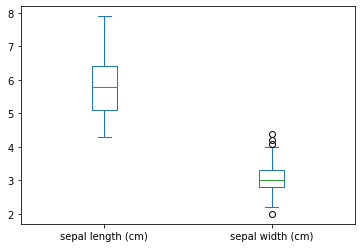

In [77]:
data[["sepal length (cm)","sepal width (cm)"]].plot(kind = "box")

* 各花品種的sepal length (cm)分佈

target
setosa        AxesSubplot(0.125,0.125;0.775x0.755)
versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
virginica     AxesSubplot(0.125,0.125;0.775x0.755)
Name: sepal length (cm), dtype: object

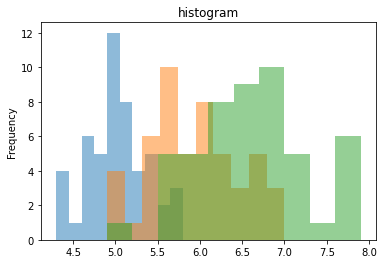

In [83]:
data.groupby(['target'])["sepal length (cm)"].plot(kind = "hist",title = "histogram",alpha = 0.5)

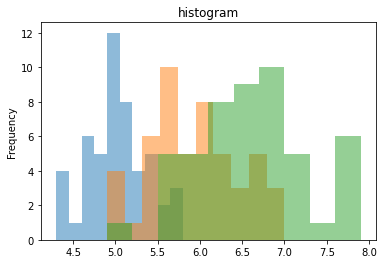

In [125]:
import matplotlib.pyplot as plt
data.groupby(['target'])["sepal length (cm)"].plot(kind = "hist",title = "histogram",alpha = 0.5)
plt.show()